# Import dataset and packages

In [2]:
#Import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import os

In [3]:
user=pd.read_csv('C:/Users/YufeiLu/Downloads/USER_TAKEHOME.csv')
user.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [13]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   ID            100000 non-null  object             
 1   CREATED_DATE  100000 non-null  datetime64[ns, UTC]
 2   BIRTH_DATE    96325 non-null   datetime64[ns, UTC]
 3   STATE         95188 non-null   object             
 4   LANGUAGE      69492 non-null   object             
 5   GENDER        94108 non-null   object             
dtypes: datetime64[ns, UTC](2), object(4)
memory usage: 4.6+ MB


# Check datatypes and change if necessary

In [5]:
user.dtypes
## Recommendation: Better if data type for created date, birth date are date

ID              object
CREATED_DATE    object
BIRTH_DATE      object
STATE           object
LANGUAGE        object
GENDER          object
dtype: object

In [4]:
user['CREATED_DATE'] = pd.to_datetime(user['CREATED_DATE'])
user['BIRTH_DATE'] = pd.to_datetime(user['BIRTH_DATE'])
user['ID'] = user['ID'].astype(str)


# Check missing value

In [9]:
user.isnull().sum()
## Found some missing values in user information, however, there're no missing value in user ID and created date.


ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64

In [10]:
# What's the percentage of missing value in each column? This helps to decide what user demographic information would be informative in later analysis. 
user.isnull().mean() * 100
## 30.5% of language is missing, indicating this may not be a good criteria to segment users.

ID               0.000
CREATED_DATE     0.000
BIRTH_DATE       3.675
STATE            4.812
LANGUAGE        30.508
GENDER           5.892
dtype: float64

# Check duplicated value

In [11]:
# Check duplicate values and check if the primary key is unique
user.duplicated().sum()
## There's no duplicate in user table.

0

In [12]:
user['ID'].nunique() 
## Same as the length of the table -- User ID is the primary key and there's no missing nor duplicate value.

100000

# Check categorical variable and percentage
To get a big picture of what user demographic information is included.

In [14]:
user['LANGUAGE'].unique()

array(['es-419', 'en', nan], dtype=object)

In [15]:
user['GENDER'].unique()

array(['female', nan, 'male', 'non_binary', 'transgender',
       'prefer_not_to_say', 'not_listed', 'Non-Binary', 'unknown',
       'not_specified', "My gender isn't listed", 'Prefer not to say'],
      dtype=object)

In [16]:
user['STATE'].unique()

array(['CA', 'PA', 'FL', 'NC', 'NY', 'IN', nan, 'OH', 'TX', 'NM', 'PR',
       'CO', 'AZ', 'RI', 'MO', 'NJ', 'MA', 'TN', 'LA', 'NH', 'WI', 'IA',
       'GA', 'VA', 'DC', 'KY', 'SC', 'MN', 'WV', 'DE', 'MI', 'IL', 'MS',
       'WA', 'KS', 'CT', 'OR', 'UT', 'MD', 'OK', 'NE', 'NV', 'AL', 'AK',
       'AR', 'HI', 'ME', 'ND', 'ID', 'WY', 'MT', 'SD', 'VT'], dtype=object)

In [20]:
user['LANGUAGE'].value_counts()/len(user)*100
## 63% users who filled language use English

LANGUAGE
en        63.403
es-419     6.089
Name: count, dtype: float64

In [21]:
user['GENDER'].value_counts()/len(user)*100
## 64% users who filled gender information is female. 

GENDER
female                    64.240
male                      25.829
transgender                1.772
prefer_not_to_say          1.350
non_binary                 0.473
unknown                    0.196
not_listed                 0.180
Non-Binary                 0.034
not_specified              0.028
My gender isn't listed     0.005
Prefer not to say          0.001
Name: count, dtype: float64

In [22]:
user['STATE'].value_counts()/len(user)*100
## Users live pretty evenly among the states.

STATE
TX    9.028
FL    8.921
CA    8.589
NY    5.703
IL    3.794
GA    3.718
PA    3.644
OH    3.519
NC    3.399
NJ    2.899
MI    2.582
VA    2.400
IN    2.213
TN    2.165
AL    1.792
SC    1.773
KY    1.731
AZ    1.728
MO    1.652
MD    1.636
MA    1.523
WI    1.389
PR    1.361
LA    1.290
WA    1.234
CO    1.139
MN    1.125
CT    1.110
OK    1.100
AR    1.011
MS    0.960
IA    0.933
NV    0.837
KS    0.835
OR    0.700
WV    0.674
UT    0.593
DE    0.492
NE    0.487
NM    0.452
ME    0.368
NH    0.359
HI    0.350
ID    0.350
AK    0.297
RI    0.284
DC    0.241
SD    0.205
ND    0.185
MT    0.169
WY    0.138
VT    0.111
Name: count, dtype: float64

# Check date columns 
1. What year did users create profile? -- From Created_Date
2. What's the generation of the users? -- From Birth_Date

In [5]:
# Extract year from CREATED_DATE and BIRTH_DATE and add a new column
user['created_year']=user['CREATED_DATE'].dt.year
user['birth_year']=user['BIRTH_DATE'].dt.year

In [6]:
create_year_pct=user['created_year'].value_counts()/len(user)*100
create_year_pct
## It is a dataset that has users from 2014-2024. 26.8% users created profile in 2022, which is the most active year. 
## Followup quesiton: What did we do in 2021-2022 to attract users? Is there any seasonality?

created_year
2022    26.807
2021    19.159
2020    16.883
2023    15.464
2024    11.631
2019     7.093
2018     2.168
2017     0.644
2016     0.070
2015     0.051
2014     0.030
Name: count, dtype: float64

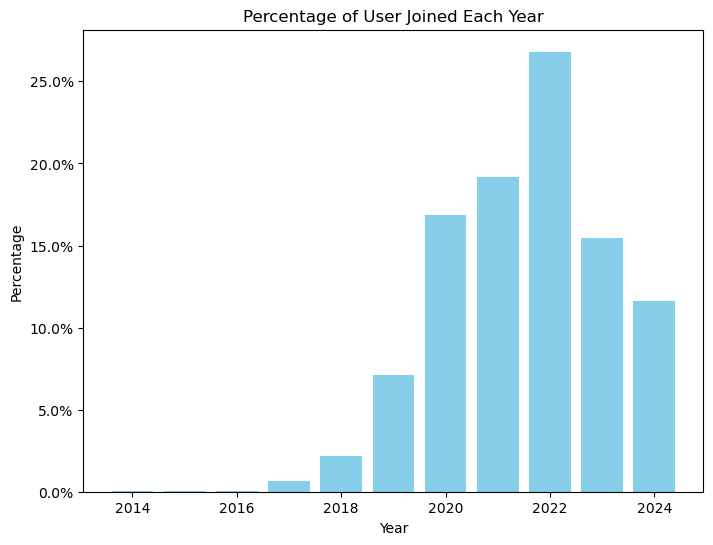

In [20]:
# Data Visualization for the percentage of users joined each year.
create_year_pct=pd.DataFrame(create_year_pct)
create_year_pct.columns=['Percentage']
plt.figure(figsize=(8,6))
# plt.pie(create_year_pct['Percentage'], labels=create_year_pct.index,autopct='%1.0f%%', startangle=140)
plt.bar(create_year_pct.index,create_year_pct['Percentage'],color='skyblue')
plt.ylabel('Percentage')
plt.xlabel('Year')

# To show percentage on Y-axis label
def to_percent(y, _):
    return f'{y:.1f}%' 
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.title('Percentage of User Joined Each Year')
plt.show()

In [27]:
user['birth_year'].value_counts()/len(user)*100
## There isn't an outstanding generation that could represent the users.
## Also found an outlier in 1907 -- need to detect outliers in the next step.

birth_year
2000.0    5.775
1980.0    3.355
1982.0    3.155
1981.0    2.915
1999.0    2.764
          ...  
1924.0    0.001
1922.0    0.001
1923.0    0.001
2017.0    0.001
1907.0    0.001
Name: count, Length: 116, dtype: float64

# Outlier detection

C:\Users\YufeiLu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


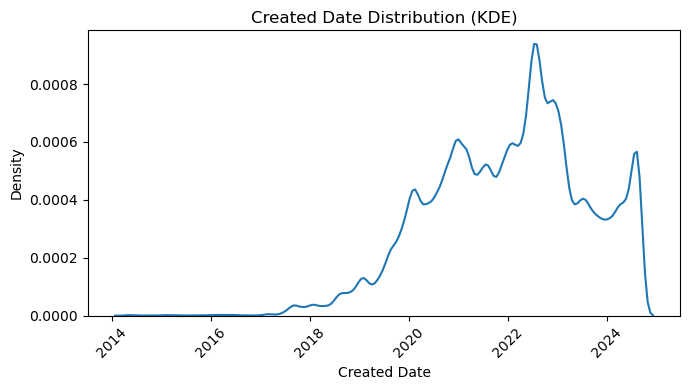

In [38]:
plt.figure(figsize=(7, 4))
sns.kdeplot(user['CREATED_DATE'], bw_adjust=0.5)
plt.title('Created Date Distribution (KDE)')
plt.xlabel('Created Date')
plt.ylabel('Density')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\YufeiLu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


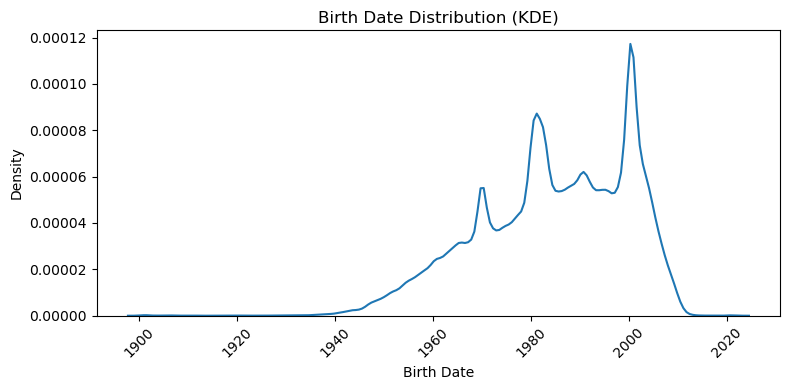

In [37]:
plt.figure(figsize=(8, 4))
sns.kdeplot(user['BIRTH_DATE'], bw_adjust=0.5)
plt.title('Birth Date Distribution (KDE)')
plt.xlabel('Birth Date')
plt.ylabel('Density')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
## 

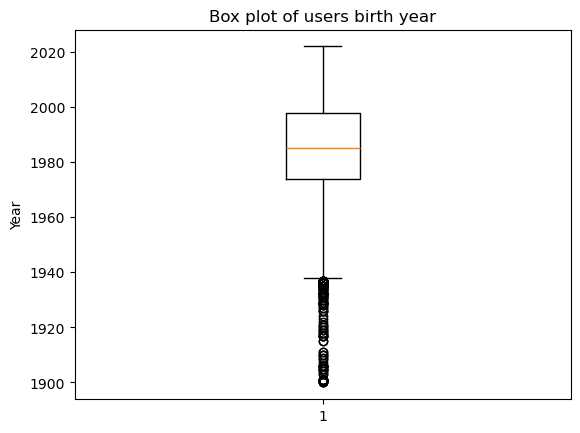

In [40]:
# Identify outliers using boxplot.
plt.boxplot(user['birth_year'].dropna())
plt.title('Box plot of users birth year')
plt.ylabel('Year')
plt.show()
## We can set a line (e.g. 99.7%) to remove the outliers. This line can be based on both domain knowledge and statisitcal percentage. 
# However, the birth year outliers can be users just randomly put in a number. 
# I'd prefer remove the outliers with high percentile and just avoid using this information for important decision.

In [51]:
lower_bound=user['birth_year'].quantile(0.005)
print(lower_bound)
# Remove outliers
user_cleaned = user[(user['birth_year'] >= lower_bound)]

1944.0


# Write cleaned dataframe to csv and save

In [54]:
# Gets the current working directory
original_path = os.getcwd()  

# Write DataFrame to CSV in the original path
user.to_csv(os.path.join(original_path, 'user.csv'), index=False)

# Insight
1. There is not a specific state that users live in the most. There isn't a main generation of our users, however, most of the users are adult (over 21).
2. Users created the profile in 2021-2022 the most. We could use the information to figure out why and how to improve to attract new users.
# Issues
1. The data types are not very accurate.
2. User birth date has some outliers -- could be real outliers or users randomly put in numbers. Need to pay attention when using this piece of information.